In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
liar = pd.read_pickle('../../data/trimmed_processed/LIAR.pkl')
fever = pd.read_pickle('../../data/trimmed_processed/FEVER.pkl')

In [3]:
df = pd.concat([liar,fever])
df.shape
df['label'].value_counts()

label
FAKE    35432
REAL    35432
Name: count, dtype: int64

In [4]:
df.isnull().sum()

text           0
label          0
text_length    0
dtype: int64

In [5]:
x = df['text'].astype(str)
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [9]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=25000,
    max_df=0.8,
    ngram_range=(1,2)
)

x_train_idf = tfidf.fit_transform(x_train)
x_test_idf = tfidf.transform(x_test)

In [10]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(x_train_idf,y_train)

y_pred = clf.predict(x_test_idf)

              precision    recall  f1-score   support

        FAKE     0.6447    0.6076    0.6256      7087
        REAL     0.6289    0.6651    0.6465      7086

    accuracy                         0.6364     14173
   macro avg     0.6368    0.6364    0.6361     14173
weighted avg     0.6368    0.6364    0.6360     14173



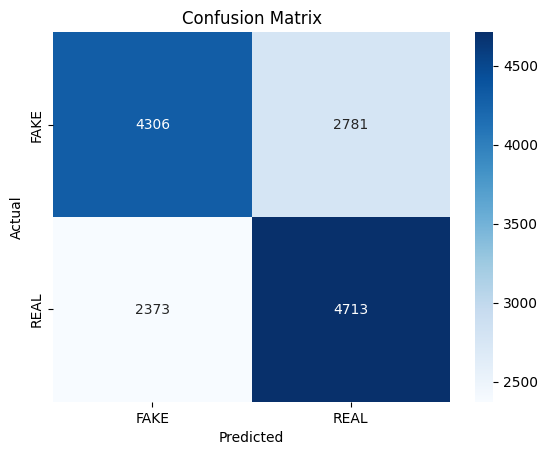

In [11]:
print(classification_report(y_test,y_pred, digits=4))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=clf.classes_,yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()